In [3]:
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import pandas as pd
import datetime as dt
import sklearn.metrics as mtr


In [4]:
df=pd.read_csv('Problem_C_Data_Wordle_frequency.csv')
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Problem_C_Data_Wordle_frequency.csv'

In [3]:
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),expectation,index,Word.1,Frequent
0,5/4/2022,319,train,107750,7243,6,26,32,22,10,3,0,3.10,242,train,4.96
1,4/22/2022,307,plant,119232,7731,2,19,39,28,10,3,0,3.37,254,plant,4.89
2,4/9/2022,294,stair,134210,8537,2,21,36,26,11,4,1,3.42,267,stair,3.26
3,12/19/2022,548,slate,26010,2422,6,14,33,27,13,5,1,3.43,13,slate,3.82
4,11/26/2022,525,clen,26381,2424,1,17,36,31,12,3,0,3.45,36,clen,1.47


In [71]:
#create the list of expectations
words=[]
for i in range(359):
    words.append(str(df.iloc[i,2]))

expectation=[]
for i in range(359):
    expectation.append(float(df.iloc[i,12]))

lst_frequency=[]
for i in range(359):
    lst_frequency.append(float(df.iloc[i,15]))

lst_sqrt_frequency=[]
for i in range(359):
    lst_sqrt_frequency.append(np.sqrt(lst_frequency[i]))

lst_power_frequency=[]
for i in range(359):
    lst_power_frequency.append(lst_frequency[i]**2)

lst_log_frequency=[]
for i in range(359):
    lst_log_frequency.append(np.log(lst_frequency[i]+1))



In [66]:
#generate the list of repeated letter
def duplicate(word):
    dic={}
    for l in word:
        if l not in dic.keys():
            dic[l]=1
        elif l in dic.keys():
            dic[l]+=1
    if max(list(dic.values()))>1:
        return 1
    return 0
duplicate_lst=[]
for i in range(359):
    duplicate_lst.append(duplicate(words[i]))

In [75]:
#generate the list of frequent word in frequent positions
dic={'a':[1,2,3,4],'b':[1],'c':[1],'d':[2,3,4,5],
'e':[2,3,4,5],'f':[0],'g':[2],'h':[2,5],'i':[3,4],
'j':[],'k':[4,2],'l':[4,5],'m':[1],'n':[2,3,4],'o':[3],
'p':[1],'q':[2],'r':[3,4,5],'s':[1,4],'t':[1,4,5],
'u':[3],'v':[],'w':[],'x':[],'y':[5],'z':[]}
lst_letter_index=[]
for i in range(359):
    index=0
    for j in range(len(words[i])):
        if words[i][j] in dic.keys():
            #print(words[i][j],dic[words[i][j]])
            if j+1 in dic[words[i][j]]:
                index+=1
    lst_letter_index.append(index)

# then we add how many times a hight frequency letter appears in the word
dic2={'a':[2,3,4],'b':[],'c':[1],'d':[],'e':[3,4,5],'f':[],
'g':[2],'h':[],'i':[3],'j':[],'k':[2],'l':[],'m':[],
'n':[2],'o':[3],'p':[],'q':[2],'r':[5],'s':[1],'t':[1,5],
'u':[],'v':[],'w':[],'x':[],'y':[5],'z':[]}
high_frequency_letter_lst=[]
for i in range(359):
    index=0
    for j in range(len(words[i])):
        if words[i][j] in dic2.keys():
            if dic2[words[i][j]]:
                index+=1
    high_frequency_letter_lst.append(index)
print(high_frequency_letter_lst)

[5, 3, 5, 4, 3, 4, 3, 3, 4, 4, 4, 3, 5, 5, 3, 5, 3, 3, 3, 2, 3, 4, 4, 5, 2, 5, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5, 5, 2, 4, 3, 3, 3, 4, 4, 3, 3, 5, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 5, 3, 4, 4, 5, 4, 3, 2, 3, 4, 3, 4, 3, 3, 3, 2, 4, 4, 3, 3, 3, 3, 4, 3, 5, 3, 3, 3, 4, 4, 5, 4, 2, 5, 5, 3, 2, 4, 5, 3, 3, 4, 4, 3, 3, 4, 5, 4, 2, 4, 2, 3, 3, 2, 4, 4, 3, 3, 4, 4, 4, 5, 3, 4, 5, 3, 5, 3, 3, 4, 5, 4, 4, 4, 4, 2, 4, 2, 3, 5, 2, 5, 4, 5, 3, 3, 4, 2, 3, 3, 4, 3, 3, 2, 4, 2, 4, 1, 5, 3, 2, 3, 4, 5, 2, 4, 4, 3, 3, 2, 5, 4, 1, 3, 3, 2, 5, 3, 3, 3, 4, 3, 4, 3, 4, 2, 5, 3, 2, 4, 4, 4, 4, 3, 3, 3, 4, 4, 2, 5, 4, 5, 3, 3, 3, 2, 2, 3, 2, 3, 3, 4, 3, 4, 3, 3, 4, 3, 3, 1, 5, 5, 4, 3, 3, 4, 4, 5, 3, 4, 4, 3, 3, 5, 3, 3, 2, 4, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 5, 5, 3, 2, 4, 0, 2, 4, 4, 5, 4, 3, 2, 4, 3, 2, 4, 3, 4, 3, 3, 3, 4, 4, 4, 2, 4, 3, 4, 3, 4, 2, 4, 2, 5, 2, 3, 4, 3, 5, 4, 4, 4, 3, 2, 3, 4, 3, 2, 4, 4, 3, 4, 4, 3, 2, 3, 3, 4, 2, 4, 3, 4, 5, 4, 3, 3, 4, 5, 4, 2, 4, 3, 3, 4, 5, 3, 5, 3, 3, 3, 2, 3, 4, 2, 

In [ ]:
#calculate the log likelihood
dic={'a':[0.078,0.1365,0.1170,0.0836,0.0251],
''}

In [76]:
#generate the data frame for the correlation matrix
data={'expectation':expectation,
      'frequency':lst_frequency,
      'log frequency':lst_log_frequency,
      'square root frequency':lst_sqrt_frequency,
      'power frequency':lst_power_frequency,
      'repeated letters':duplicate_lst,
      'flfp':lst_letter_index,
      'number of high frequency letter':high_frequency_letter_lst
}
print(len(expectation),
      len(lst_frequency),
      len(lst_log_frequency),
      len(lst_sqrt_frequency),
      len(lst_power_frequency),
      len(duplicate_lst),
      len(lst_letter_index)
)

df=pd.DataFrame(data)

corr_matrix=df.corr()
print(corr_matrix)

359 359 359 359 359 359 359
                                 expectation  frequency  log frequency  \
expectation                         1.000000  -0.247261      -0.218659   
frequency                          -0.247261   1.000000       0.964445   
log frequency                      -0.218659   0.964445       1.000000   
square root frequency              -0.215669   0.965706       0.999242   
power frequency                    -0.250187   0.979577       0.895469   
repeated letters                    0.369048  -0.090505      -0.091604   
flfp                               -0.240626   0.035905       0.029757   
number of high frequency letter    -0.164610  -0.050562      -0.034068   

                                 square root frequency  power frequency  \
expectation                                  -0.215669        -0.250187   
frequency                                     0.965706         0.979577   
log frequency                                 0.999242         0.895469   
squar

In [5]:
#calculate the corelation index
import statistics as st
covariance_matrix=np.cov(expectation,lst_frequency)
covariance=covariance_matrix[0][1]

stdev_expect=st.stdev(expectation)
stdev_frequency=st.stdev(lst_frequency)

corelation_index=covariance/(stdev_expect*stdev_frequency)
print(corelation_index)

-0.24726095424495312


In [35]:
#calculate the corelation index of sqrt frequency
covariance_matrix2=np.cov(expectation,lst_sqrt_frequency)
covariance2=covariance_matrix2[0][1]
print(covariance2)

stdev_sqrt_frequency=st.stdev(lst_sqrt_frequency)

corelation_index_sqrt=covariance2/(stdev_expect*stdev_sqrt_frequency)
print(corelation_index_sqrt)

-0.023647851815615687
-0.2156692203163482


In [60]:
#calculate the corelation index of power frequency
covariance_matrix3=np.cov(expectation,lst_power_frequency)
covariance3=covariance_matrix3[0][1]
print(covariance3)

stdev_power_frequency=st.stdev(lst_power_frequency)
print(stdev_power_frequency)
print(stdev_expect)
corelation_index_power=covariance3/(stdev_expect*stdev_power_frequency)
print(corelation_index_power)


-0.01951075500846163
0.22105330782885335
0.4036552076328683
-0.2186585671126471


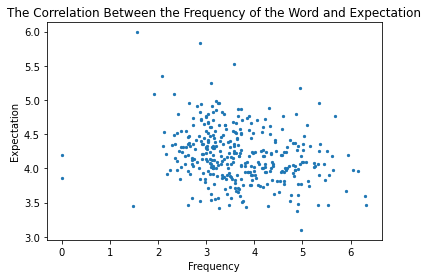

In [7]:

plt.figure()
plt.title('The Correlation Between the Frequency of the Word and Expectation')
plt.xlabel('Frequency')
plt.ylabel('Expectation')
plt.scatter(lst_frequency,expectation,s=5)


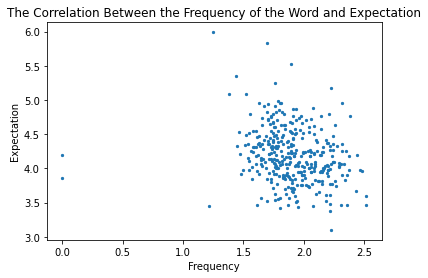

In [13]:
plt.figure()
plt.title('The Correlation Between the Frequency of the Word and Expectation')
plt.xlabel('Frequency')
plt.ylabel('Expectation')
plt.scatter(lst_sqrt_frequency,expectation,s=5)

In [85]:
#create the list of all features
lst_feature_vector=[]
for i in range(359):
    feature_vector=[]
    feature_vector.append(lst_power_frequency[i])
    feature_vector.append(duplicate_lst[i])
    feature_vector.append(lst_letter_index[i])
    feature_vector.append(high_frequency_letter_lst[i])
    lst_feature_vector.append(feature_vector)


In [89]:
import random
#create the training set and testing set 
#randomly take 287 words as traing set and 72 words as testing set
training_lst_expectations=[]
training_lst_features=[]
testing_lst_expectations=[]
testing_lst_features=[]

lst_index_train=random.sample(range(0,358), 287)

lst_index_test=[i for i in range(359)]
for i in lst_index_train:
    lst_index_test.remove(i)

for i in lst_index_train:
    training_lst_expectations.append(expectation[i])
    training_lst_features.append(lst_feature_vector[i])
for i in lst_index_test:
    testing_lst_expectations.append(expectation[i])
    testing_lst_features.append(lst_feature_vector[i])





In [95]:
#using KNeighborsRegressor to predict
from sklearn.neighbors import KNeighborsRegressor
#fit the feature vectors into ml models
KNR=KNeighborsRegressor()

KNR.fit(training_lst_features,training_lst_expectations)
Y_pred_KNR=KNR.predict(testing_lst_features)

MSE_KNR=mtr.mean_squared_error(Y_pred_KNR,testing_lst_expectations)
print(MSE_KNR)

#the feature vector for the word eerie frequency:3.33
print(KNR.predict([[11.0889,1,4,4]]))


0.23228272222222224
[4.212]


In [96]:
#using random forest regressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
RFR=RandomForestRegressor()

RFR.fit(training_lst_features,training_lst_expectations)
Y_pred_RFR=RFR.predict(testing_lst_features)

MSE_RFR=mtr.mean_squared_error(Y_pred_RFR,testing_lst_expectations)
print(MSE_RFR)

print(RFR.predict([[11.0889,1,4,4]]))

0.21823274487959074
[4.4909]


In [97]:
#using gradient boosting regressor
GRB=GradientBoostingRegressor()

GRB.fit(training_lst_features,training_lst_expectations)
Y_pred_GRB=GRB.predict(testing_lst_features)

MSE_GRB=mtr.mean_squared_error(Y_pred_GRB,testing_lst_expectations)
print(MSE_GRB)

print(GRB.predict([[11.0889,1,4,4]]))

0.23668576886137593
[4.44940359]


: 

In [ ]:
#use deep learning to fit the data and predict
import tensorflow as tf
from tensorflow im